In [1]:
# Dataset: wine-class.csv
# Location: https://mitu.co.in/dataset

In [29]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('wine-class.csv')

In [5]:
df.shape

(178, 14)

In [6]:
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# input data
x = df.drop('class', axis = 1)

# output data
y = df['class']

<AxesSubplot:xlabel='class', ylabel='count'>

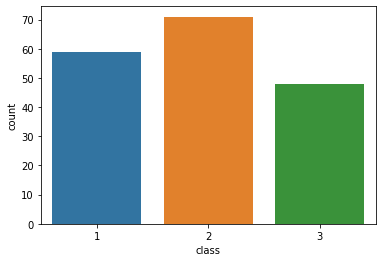

In [9]:
sns.countplot(x = y)

In [10]:
y.value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [14]:
# Cross-validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [15]:
x_train.shape

(133, 13)

In [16]:
x_test.shape

(45, 13)

In [17]:
# Import the class
from sklearn.naive_bayes import GaussianNB

In [18]:
# create the object
clf = GaussianNB()

In [19]:
# Train the algorithm
clf.fit(x_train, y_train)

GaussianNB()

In [20]:
# Prediction on unseen data
y_pred = clf.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

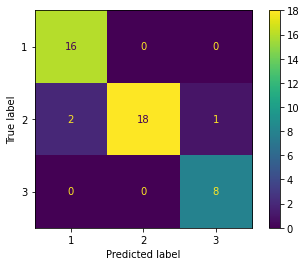

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [23]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        16
           2       1.00      0.86      0.92        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



In [25]:
new = [[3.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735]]

In [30]:
clf.predict(new)[0]

2

In [31]:
new =[[13.4,4.6,2.86,25,112,1.98,0.96,0.27,1.11,8.5,0.67,1.92,630]]
clf.predict(new)[0]

3

In [32]:
clf.predict_proba(new)

array([[9.63029979e-19, 3.91964059e-17, 1.00000000e+00]])

In [33]:
import numpy as np
np.argmax(clf.predict_proba(new))

2

In [35]:
sum(clf.predict_proba(new)[0])

1.0